# 1. Data Exploration and Preprocessing

In [1]:

# Load data
import pandas as pd
df=pd.read_csv("D:\\Data science\\assignments\\blogs_categories.csv")
df

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [3]:
# checking feature count
print(df['Labels'].value_counts())

alt.atheism                 1000
comp.graphics               1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.politics.guns          1000
sci.space                   1000
sci.med                     1000
sci.electronics             1000
sci.crypt                   1000
rec.sport.hockey            1000
rec.sport.baseball          1000
rec.motorcycles             1000
rec.autos                   1000
misc.forsale                1000
comp.windows.x              1000
comp.sys.mac.hardware       1000
comp.sys.ibm.pc.hardware    1000
comp.os.ms-windows.misc     1000
talk.religion.misc          1000
soc.religion.christian       997
Name: Labels, dtype: int64


<Axes: xlabel='count', ylabel='Labels'>

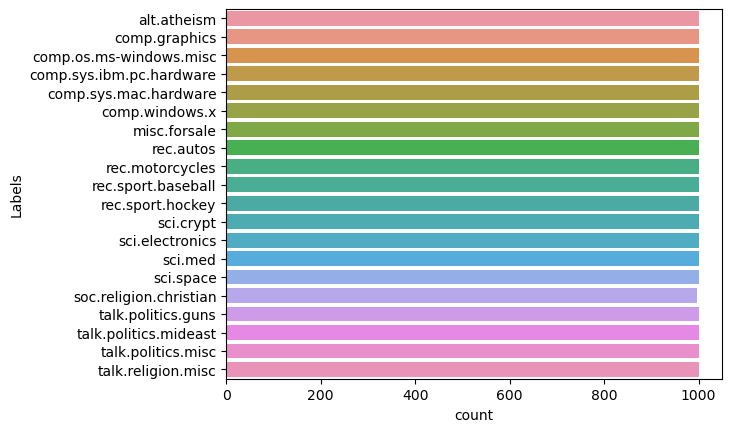

In [4]:
# visualization
import seaborn as sns
import nltk
sns.countplot(y='Labels', data=df)

In [5]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\gmani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\gmani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\gmani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\gmani\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\gmani\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [6]:
# Preprocess the data
# call the every row from the df['message'] and convert all the words in lower case

df['Data'] = df['Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# write down the code to remove stop words for each row of df['message']

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df['Data'] = df['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,Data,Labels
0,0,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,newsgroups: alt.atheism path: cantaloupe.srv.c...,alt.atheism
3,3,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [7]:
# write down the code to remove punctuations for each row of df['message']

import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

df['Data'] = df['Data'].apply(remove_punctuation)
df.head()

,Unnamed: 0,Data,Labels
0,0,xref cantaloupe srv cs cmu edu alt atheism 49...,alt.atheism
1,1,xref cantaloupe srv cs cmu edu alt atheism 51...,alt.atheism
2,2,newsgroups alt atheism path cantaloupe srv c...,alt.atheism
3,3,xref cantaloupe srv cs cmu edu alt atheism 51...,alt.atheism
4,4,xref cantaloupe srv cs cmu edu alt atheism 51...,alt.atheism


In [8]:
# add all the messages from df and save in to a new variable

all_Data = ""
for Data in df['Data']:
  all_Data += Data + " "

# apply the tokenization on all_messages and sort the data

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")

tokenized_Data = tokenizer.tokenize(all_Data)

sorted_tokens = sorted(tokenized_Data)

print(sorted_tokens)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
# for the above df['Data'] apply stemming

from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stem_Data(Data):
  stemmed_Data = []
  for word in Data.split():
    stemmed_Data.append(ps.stem(word))
  return " ".join(stemmed_Data)

df['Data'] = df['Data'].apply(stem_Data)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['Data'])

print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2. Naive Bayes Model for Text Classification

In [10]:
# Split the data into training and test sets.

X = vectorizer.fit_transform(df['Data'])
y = df['Labels'] 

# Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

# Train the model on the training set and make predictions on the test set.

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

from sklearn.metrics import classification_report, accuracy_score

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy: 0.9474276426830031
Test Accuracy: 0.89475
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.81      0.80       173
           comp.graphics       0.85      0.87      0.86       179
 comp.os.ms-windows.misc       0.94      0.89      0.92       226
comp.sys.ibm.pc.hardware       0.84      0.86      0.85       204
   comp.sys.mac.hardware       0.88      0.95      0.92       205
          comp.windows.x       0.94      0.91      0.93       186
            misc.forsale       0.91      0.82      0.86       190
               rec.autos       0.88      0.94      0.90       203
         rec.motorcycles       0.99      0.95      0.97       218
      rec.sport.baseball       0.98      0.94      0.96       192
        rec.sport.hockey       0.95      0.98      0.96       203
               sci.crypt       0.92      0.98      0.95       200
         sci.electronics       0.94      0.82      0.88       227
                 

# 3. Sentiment Analysis

In [11]:
# Choose a suitable library or method for performing sentiment analysis on the blog post texts.

# Import the required library for sentiment analysis
!pip install textblob
from textblob import TextBlob
# Define a function to analyze the sentiment of a blog post
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'
    
# Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

# Analyze the sentiment of each blog post
df['Sentiment'] = df['Data'].apply(analyze_sentiment)

# Group the blog posts by category and sentiment
grouped_df = df.groupby(['Labels', 'Sentiment']).size().unstack()

# Print the distribution of sentiments across different categories
print(grouped_df)

# Examine the distribution of sentiments across different categories and summarize your findings.

print("Distribution of sentiments across different categories:")
# Summarize the findings
positive_count = grouped_df['positive'].sum()
negative_count = grouped_df['negative'].sum()
neutral_count = grouped_df['neutral'].sum()

print("Total positive blog posts:", positive_count)
print("Total negative blog posts:", negative_count)
print("Total neutral blog posts:", neutral_count)

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                  364.0      1.0     635.0
comp.graphics                434.0      1.0     565.0
comp.os.ms-windows.misc      343.0      2.0     655.0
comp.sys.ibm.pc.hardware     382.0      4.0     614.0
comp.sys.mac.hardware        379.0      1.0     620.0
comp.windows.x               453.0     10.0     537.0
misc.forsale                 378.0      1.0     621.0
rec.autos                    245.0      2.0     753.0
rec.motorcycles              353.0      1.0     646.0
rec.sport.baseball           378.0      1.0     621.0
rec.sport.hockey             421.0      1.0     578.0
sci.crypt                    343.0      NaN     657.0
sci.electronics              327.0      1.0     672.0
sci.med                      396.0      3.0     601.0
sci.space                    364.0      2.0     634.0
soc.religion.christian       341.0      NaN     656.0
talk.politics.guns          

# 4. Evaluation


In [12]:


# Evaluate the performance of the Naive Bayes classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.89475
Precision: 0.8953759501303385
Recall: 0.89475
F1-score: 0.8940688013934303
